<a href="https://colab.research.google.com/github/smilieSushmitha/AV-V/blob/main/data_distribution_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import adfuller

#Mount Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Data

In [11]:
data = pd.read_csv('/content/drive/MyDrive/AV_V/all_and_classification.csv')  # load data set
data = data.drop('file_name', axis=1)
data = data.drop('run', axis=1)
data['forks'] = data['forks'].replace(['steady state'], 1)
data['forks'] = data['forks'].replace(['no steady state'], 0)
data = data.loc[data['forks'] == 1]
data = data.drop('forks', axis=1)
data.head()
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,steady_state_starts
count,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,...,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5219.000000
mean,4.018425e-01,2.994490e-01,3.051423e-01,2.890322e-01,2.884165e-01,2.816810e-01,2.886073e-01,2.873358e-01,2.856900e-01,2.824899e-01,...,2.812317e-01,2.706402e-01,2.645620e-01,2.720537e-01,2.726118e-01,2.702777e-01,2.676275e-01,2.678171e-01,2.745130e-01,388.204062
std,1.681312e+00,1.432261e+00,1.567145e+00,1.439768e+00,1.446128e+00,1.417174e+00,1.438246e+00,1.472499e+00,1.437947e+00,1.420508e+00,...,1.508096e+00,1.383847e+00,1.332807e+00,1.392757e+00,1.393100e+00,1.377329e+00,1.357020e+00,1.359469e+00,1.418902e+00,668.668688
min,3.473333e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,...,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,0.000000
25%,2.399731e-06,6.187494e-07,4.840219e-07,4.714874e-07,4.575839e-07,4.316306e-07,4.196649e-07,4.050134e-07,4.047062e-07,3.981725e-07,...,3.066419e-07,3.095082e-07,3.103955e-07,3.071102e-07,3.065023e-07,3.131790e-07,3.105376e-07,3.061157e-07,3.050098e-07,1.000000
50%,1.821192e-04,6.742638e-05,4.278408e-05,3.476635e-05,3.163280e-05,3.041167e-05,2.882877e-05,2.595442e-05,2.578813e-05,2.368173e-05,...,1.899333e-05,1.904057e-05,1.897162e-05,1.883356e-05,1.884534e-05,1.882958e-05,1.876486e-05,1.893652e-05,1.889167e-05,37.000000
75%,1.188823e-01,8.503637e-03,6.763861e-03,6.756489e-03,6.800452e-03,6.161348e-03,5.404888e-03,5.634503e-03,5.625856e-03,5.781959e-03,...,4.829964e-03,4.848460e-03,4.824893e-03,4.869949e-03,4.882172e-03,4.854540e-03,4.927586e-03,4.953234e-03,4.867218e-03,394.500000
max,2.016621e+01,1.546859e+01,2.731331e+01,2.855482e+01,1.949512e+01,2.623957e+01,1.775029e+01,2.170972e+01,2.164261e+01,2.033399e+01,...,1.915958e+01,1.499883e+01,1.499883e+01,1.499883e+01,1.499883e+01,1.499883e+01,1.501561e+01,1.499883e+01,1.499883e+01,2497.000000


In [12]:
x_data = data.drop('steady_state_starts', axis=1)
y_data = data['steady_state_starts']


[   0.    624.25 1248.5  1872.75 2497.  ]


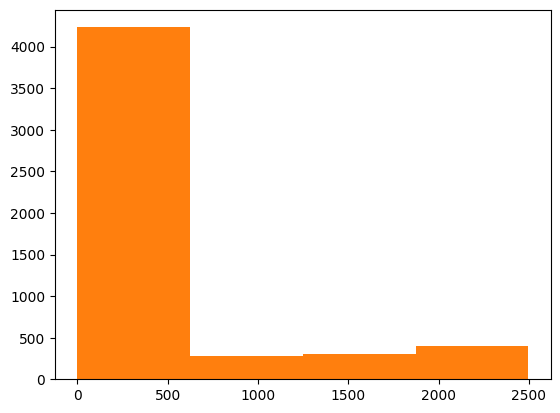

In [6]:
import matplotlib.pyplot as plt
mpgs = data['steady_state_starts']
plt.hist(mpgs, bins=4)
print(plt.hist(mpgs, bins=4)[1])
plt.show()